In [1]:
#import dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in data frame from database 
data_df = pd.read_csv("Resources/Clean_Data.csv")

In [3]:
data_df

,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,COVID-19 Deaths
0,2020-01-04,1,Hispanic,9
1,2020-01-04,1,Non-Hispanic American Indian or Alaska Native,9
2,2020-01-04,1,Non-Hispanic Asian,9
3,2020-01-04,1,Non-Hispanic Black,9
4,2020-01-04,1,Non-Hispanic More than one race,9
...,...,...,...,...
4755,2021-04-17,10,Non-Hispanic Asian,7
4756,2021-04-17,10,Non-Hispanic Black,9
4757,2021-04-17,10,Non-Hispanic More than one race,9
4758,2021-04-17,10,Non-Hispanic Native Hawaiian or Other Pacific ...,8


In [4]:
#get the total deaths in week
weekly_deaths = data_df.groupby(["Week-Ending Date"]).sum()["COVID-19 Deaths"]
weekly_deaths

Week-Ending Date
2020-01-04    630
2020-01-11    630
2020-01-18    627
2020-01-25    629
2020-02-01    630
             ... 
2021-03-20    480
2021-03-27    495
2021-04-03    495
2021-04-10    476
2021-04-17    508
Name: COVID-19 Deaths, Length: 68, dtype: int64

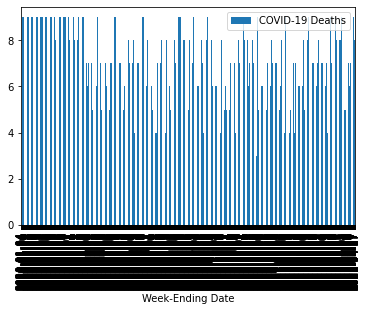

In [5]:
data_df.plot.bar(x="Week-Ending Date", y="COVID-19 Deaths")

plt.show()

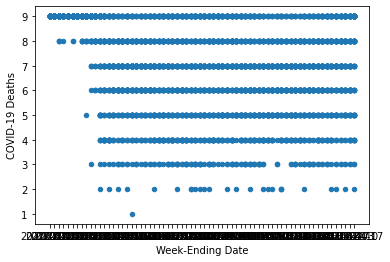

In [6]:
data_df.plot.scatter(x="Week-Ending Date", y="COVID-19 Deaths")
plt.show()